In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
import joblib

filename = '../Data/DataFrame/dataframes_dict.joblib'
loaded_dataframes_dict = joblib.load(filename)

In [7]:
city_weather_df = loaded_dataframes_dict['city_weather']
drivers_df  = loaded_dataframes_dict['drivers_table']
routes_df  = loaded_dataframes_dict['routes_table']
routes_weather_df  = loaded_dataframes_dict['routes_weather']
traffic_df  = loaded_dataframes_dict['traffic_table']
truck_schedule_df  = loaded_dataframes_dict['truck_schedule_table']
trucks_df  = loaded_dataframes_dict['trucks_table']

# Calculating Mean on all tables

## City Weather table

In [8]:
city_weather_df

,city_id,date,hour,temp,wind_speed,description,precip,humidity,visibility,pressure,chanceofrain,chanceoffog,chanceofsnow,chanceofthunder
0,C-927ceb5e,2019-01-01,0,30,11,Light snow,0.0,86,6,1019,0,0,0,0
1,C-927ceb5e,2019-01-01,100,28,12,Light snow,0.0,86,5,1021,0,0,0,0
2,C-927ceb5e,2019-01-01,200,28,13,Moderate snow,0.0,85,4,1022,0,0,0,0
3,C-927ceb5e,2019-01-01,300,28,14,Moderate snow,0.0,84,3,1024,0,0,0,0
4,C-927ceb5e,2019-01-01,400,28,13,Moderate snow,0.0,84,3,1025,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55171,C-594514f8,2019-02-15,1900,23,3,Cloudy,0.0,74,6,1018,0,0,0,0
55172,C-594514f8,2019-02-15,2000,23,3,Light snow,0.0,74,6,1018,0,0,0,0
55173,C-594514f8,2019-02-15,2100,23,3,Light snow,0.0,75,6,1019,0,0,0,0
55174,C-594514f8,2019-02-15,2200,23,2,Light snow,0.0,75,6,1019,0,0,0,0


In [9]:
city_weather = city_weather_df.iloc[:,:10]
city_weather = city_weather.drop(['description','hour'], axis=1)

In [10]:
city_weather

,city_id,date,temp,wind_speed,precip,humidity,visibility,pressure
0,C-927ceb5e,2019-01-01,30,11,0.0,86,6,1019
1,C-927ceb5e,2019-01-01,28,12,0.0,86,5,1021
2,C-927ceb5e,2019-01-01,28,13,0.0,85,4,1022
3,C-927ceb5e,2019-01-01,28,14,0.0,84,3,1024
4,C-927ceb5e,2019-01-01,28,13,0.0,84,3,1025
...,...,...,...,...,...,...,...,...
55171,C-594514f8,2019-02-15,23,3,0.0,74,6,1018
55172,C-594514f8,2019-02-15,23,3,0.0,74,6,1018
55173,C-594514f8,2019-02-15,23,3,0.0,75,6,1019
55174,C-594514f8,2019-02-15,23,2,0.0,75,6,1019


In [11]:
city_weather_mean_df = city_weather.groupby(['city_id','date']).mean().reset_index()
city_weather_mean_df

,city_id,date,temp,wind_speed,precip,humidity,visibility,pressure
0,C-01660979,2019-01-01,49.208333,10.125000,0.029167,69.291667,5.083333,1012.541667
1,C-01660979,2019-01-02,36.958333,5.875000,0.000000,60.208333,6.000000,1024.166667
2,C-01660979,2019-01-03,42.333333,6.000000,0.000000,65.541667,5.000000,1015.166667
3,C-01660979,2019-01-04,41.750000,8.250000,0.000000,67.833333,5.791667,1014.166667
4,C-01660979,2019-01-05,44.666667,9.000000,0.037500,86.791667,4.708333,1001.833333
...,...,...,...,...,...,...,...,...
2248,C-ff8c0c3c,2019-02-11,32.000000,7.083333,0.008333,94.583333,3.500000,1013.833333
2249,C-ff8c0c3c,2019-02-12,30.375000,10.500000,0.000000,71.791667,5.416667,1018.958333
2250,C-ff8c0c3c,2019-02-13,39.000000,8.458333,0.000000,59.166667,6.000000,1015.416667
2251,C-ff8c0c3c,2019-02-14,38.041667,11.041667,0.000000,66.625000,6.000000,1006.458333


## Routes Weather table

In [12]:
routes_weather_df

,route_id,date,temp,wind_speed,description,precip,humidity,visibility,pressure,chanceofrain,chanceoffog,chanceofsnow,chanceofthunder
0,R-ada2a391,2019-01-01 00:00:00,30,11,Heavy snow,0.0,90,1,1010,0,0,0,0
1,R-ada2a391,2019-01-01 06:00:00,30,11,Heavy snow,0.0,91,3,1012,0,0,0,0
2,R-ada2a391,2019-01-02 00:00:00,28,11,Cloudy,0.0,91,4,1013,0,0,0,0
3,R-ada2a391,2019-01-02 06:00:00,27,11,Cloudy,0.0,92,6,1015,0,0,0,0
4,R-ada2a391,2019-01-03 00:00:00,27,9,Cloudy,0.0,93,6,1016,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
425707,R-2fd2ee05,2019-02-12 18:00:00,70,12,Sunny,0.0,53,6,1015,0,0,0,0
425708,R-2fd2ee05,2019-02-13 12:00:00,68,11,Sunny,0.0,57,6,1015,0,0,0,0
425709,R-2fd2ee05,2019-02-13 18:00:00,66,9,Sunny,0.0,62,6,1015,0,0,0,0
425710,R-2fd2ee05,2019-02-14 12:00:00,63,7,Clear,0.0,66,6,1015,0,0,0,0


In [13]:
routes_weather_df.describe()

,date,temp,wind_speed,precip,humidity,visibility,pressure,chanceofrain,chanceoffog,chanceofsnow,chanceofthunder
count,425712,425712.000000,425712.000000,425712.000000,425712.000000,425712.000000,425712.000000,425712.0,425712.0,425712.0,425712.0
mean,2019-01-23 11:59:59.999999488,57.518090,8.016063,0.005530,71.654482,5.378733,1015.541540,0.0,0.0,0.0,0.0
min,2019-01-01 00:00:00,-24.000000,0.000000,0.000000,3.000000,0.000000,985.000000,0.0,0.0,0.0,0.0
25%,2019-01-12 06:00:00,43.000000,5.000000,0.000000,59.000000,6.000000,1011.000000,0.0,0.0,0.0,0.0
50%,2019-01-23 12:00:00,59.000000,7.000000,0.000000,76.000000,6.000000,1015.000000,0.0,0.0,0.0,0.0
75%,2019-02-03 18:00:00,73.000000,11.000000,0.000000,89.000000,6.000000,1019.000000,0.0,0.0,0.0,0.0
max,2019-02-15 00:00:00,113.000000,35.000000,1.300000,100.000000,6.000000,1050.000000,0.0,0.0,0.0,0.0
std,NaN,19.919266,4.469639,0.028918,21.106049,1.414776,7.306384,0.0,0.0,0.0,0.0


In [14]:
routes_weather = routes_weather_df.iloc[:,:9].drop(['description'],axis=1)
routes_weather

,route_id,date,temp,wind_speed,precip,humidity,visibility,pressure
0,R-ada2a391,2019-01-01 00:00:00,30,11,0.0,90,1,1010
1,R-ada2a391,2019-01-01 06:00:00,30,11,0.0,91,3,1012
2,R-ada2a391,2019-01-02 00:00:00,28,11,0.0,91,4,1013
3,R-ada2a391,2019-01-02 06:00:00,27,11,0.0,92,6,1015
4,R-ada2a391,2019-01-03 00:00:00,27,9,0.0,93,6,1016
...,...,...,...,...,...,...,...,...
425707,R-2fd2ee05,2019-02-12 18:00:00,70,12,0.0,53,6,1015
425708,R-2fd2ee05,2019-02-13 12:00:00,68,11,0.0,57,6,1015
425709,R-2fd2ee05,2019-02-13 18:00:00,66,9,0.0,62,6,1015
425710,R-2fd2ee05,2019-02-14 12:00:00,63,7,0.0,66,6,1015


In [15]:
routes_weather['date'] = routes_weather['date'].dt.date
routes_weather

,route_id,date,temp,wind_speed,precip,humidity,visibility,pressure
0,R-ada2a391,2019-01-01,30,11,0.0,90,1,1010
1,R-ada2a391,2019-01-01,30,11,0.0,91,3,1012
2,R-ada2a391,2019-01-02,28,11,0.0,91,4,1013
3,R-ada2a391,2019-01-02,27,11,0.0,92,6,1015
4,R-ada2a391,2019-01-03,27,9,0.0,93,6,1016
...,...,...,...,...,...,...,...,...
425707,R-2fd2ee05,2019-02-12,70,12,0.0,53,6,1015
425708,R-2fd2ee05,2019-02-13,68,11,0.0,57,6,1015
425709,R-2fd2ee05,2019-02-13,66,9,0.0,62,6,1015
425710,R-2fd2ee05,2019-02-14,63,7,0.0,66,6,1015


In [16]:
routes_weather_mean_df = routes_weather.groupby(['route_id','date']).mean().reset_index()
routes_weather_mean_df

,route_id,date,temp,wind_speed,precip,humidity,visibility,pressure
0,R-003c7a81,2019-01-01,61.50,7.50,0.0,76.25,6.00,1012.50
1,R-003c7a81,2019-01-02,61.50,6.75,0.0,78.75,4.75,1012.50
2,R-003c7a81,2019-01-03,60.75,6.75,0.0,80.25,3.50,1012.75
3,R-003c7a81,2019-01-04,61.00,7.50,0.0,81.25,3.50,1012.50
4,R-003c7a81,2019-01-05,61.75,8.00,0.0,81.50,4.25,1012.50
...,...,...,...,...,...,...,...,...
108187,R-ffe99a03,2019-02-11,66.75,6.25,0.0,64.00,6.00,1017.75
108188,R-ffe99a03,2019-02-12,62.25,7.00,0.0,73.50,6.00,1018.00
108189,R-ffe99a03,2019-02-13,56.50,5.25,0.0,75.75,6.00,1018.50
108190,R-ffe99a03,2019-02-14,54.75,5.50,0.0,78.25,6.00,1019.00


## Traffic Table

In [17]:
traffic_df

,route_id,date,hour,no_of_vehicles,accident
0,R-ada2a391,2019-01-01,0,669.0,0
1,R-ada2a391,2019-01-01,100,628.0,0
2,R-ada2a391,2019-01-01,200,516.0,0
3,R-ada2a391,2019-01-01,300,582.0,0
4,R-ada2a391,2019-01-01,400,564.0,0
...,...,...,...,...,...
2597908,R-38a366a9,2019-02-15,1900,2758.0,0
2597909,R-38a366a9,2019-02-15,2000,1934.0,1
2597910,R-38a366a9,2019-02-15,2100,1699.0,0
2597911,R-38a366a9,2019-02-15,2200,2373.0,0


In [18]:
traffic = traffic_df.drop(['hour'] , axis=1)
traffic

,route_id,date,no_of_vehicles,accident
0,R-ada2a391,2019-01-01,669.0,0
1,R-ada2a391,2019-01-01,628.0,0
2,R-ada2a391,2019-01-01,516.0,0
3,R-ada2a391,2019-01-01,582.0,0
4,R-ada2a391,2019-01-01,564.0,0
...,...,...,...,...
2597908,R-38a366a9,2019-02-15,2758.0,0
2597909,R-38a366a9,2019-02-15,1934.0,1
2597910,R-38a366a9,2019-02-15,1699.0,0
2597911,R-38a366a9,2019-02-15,2373.0,0


In [19]:
traffic_mean_df = traffic.groupby(['route_id','date']).agg({
    'no_of_vehicles': 'mean',
    'accident': 'sum'
}).reset_index()
traffic_mean_df

,route_id,date,no_of_vehicles,accident
0,R-003c7a81,2019-01-01,1837.250000,4
1,R-003c7a81,2019-01-02,1787.916667,2
2,R-003c7a81,2019-01-03,1569.666667,1
3,R-003c7a81,2019-01-04,1833.333333,3
4,R-003c7a81,2019-01-05,1621.500000,0
...,...,...,...,...
108187,R-ffe99a03,2019-02-11,1732.333333,1
108188,R-ffe99a03,2019-02-12,1751.666667,2
108189,R-ffe99a03,2019-02-13,1807.958333,2
108190,R-ffe99a03,2019-02-14,1830.541667,2


# Joining all the DataFrames


In [ ]:
merged_df = pd.merge(truck_schedule_df, routes_df, on='route_id', how='left')

merged_df = pd.merge(merged_df, trucks_df, on='truck_id', how='left')

merged_df['departure_date'] = pd.to_datetime(merged_df['departure_date']).dt.date
routes_weather['date'] = pd.to_datetime(routes_weather['date']).dt.date

merged_df = pd.merge(merged_df, routes_weather_mean_df, left_on=['route_id', 'departure_date'], right_on=['route_id', 'date'], how='left')

merged_df = pd.merge(merged_df, traffic_mean_df, left_on=['route_id', 'departure_date'], right_on=['route_id', 'date'], how='left')

merged_df = pd.merge(merged_df, drivers_df, left_on='truck_id', right_on='vehicle_no', how='left')

city_weather_mean_df['date'] = pd.to_datetime(city_weather_mean_df['date']).dt.date

merged_df = pd.merge(merged_df, city_weather_mean_df, left_on=['origin_id', 'departure_date'], right_on=['city_id', 'date'], how='left')

merged_df.drop(columns=['city_id', 'date'], inplace=True)

merged_df.drop(columns=['date_x', 'date_y'], inplace=True)

merged_df


,truck_id,route_id,departure_date,estimated_arrival,delay,origin_id,destination_id,distance,average_hours,truck_age,...,driving_style,ratings,vehicle_no,average_speed_mph,temp_y,wind_speed_y,precip_y,humidity_y,visibility_y,pressure_y
0,30312694,R-b236e347,2019-01-01,2019-01-01 13:13:12,0,C-927ceb5e,C-d80a1e7d,310.75,6.22,9,...,proactive,7,30312694,57.36,26.041667,10.500000,0.0,80.625000,5.25,1027.416667
1,59856374,R-29ea762e,2019-01-01,2019-01-02 04:01:12,0,C-927ceb5e,C-639c5e36,1050.84,21.02,7,...,proactive,8,59856374,57.04,26.041667,10.500000,0.0,80.625000,5.25,1027.416667
2,12602955,R-a3d67783,2019-01-01,2019-01-01 07:45:36,0,C-927ceb5e,C-a9f2c329,38.10,0.76,10,...,proactive,8,12602955,64.11,26.041667,10.500000,0.0,80.625000,5.25,1027.416667
3,46619422,R-31ec9310,2019-01-01,2019-01-01 20:46:48,0,C-927ceb5e,C-c7cacd1d,688.91,13.78,12,...,conservative,4,46619422,49.47,26.041667,10.500000,0.0,80.625000,5.25,1027.416667
4,10140178,R-a07c5dbd,2019-01-01,2019-01-01 21:34:12,0,C-927ceb5e,C-ef47bdcd,728.40,14.57,12,...,conservative,9,10140178,43.42,26.041667,10.500000,0.0,80.625000,5.25,1027.416667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12303,31047945,R-1484a7ea,2019-02-06,2019-02-13 22:40:12,0,C-34ae77b0,C-731988ba,9183.35,183.67,10,...,conservative,4,31047945,39.89,75.375000,9.958333,0.0,56.458333,6.00,1013.541667
12304,14758432,R-927cf900,2019-02-06,2019-02-13 18:52:48,1,C-34ae77b0,C-a9f2c329,8994.17,179.88,11,...,proactive,7,14758432,63.88,75.375000,9.958333,0.0,56.458333,6.00,1013.541667
12305,31370619,R-5a83ad98,2019-02-06,2019-02-14 08:01:48,1,C-34ae77b0,C-c7cacd1d,9651.62,193.03,10,...,proactive,8,31370619,60.14,75.375000,9.958333,0.0,56.458333,6.00,1013.541667
12306,67332883,R-991530bc,2019-02-06,2019-02-13 11:14:24,1,C-34ae77b0,C-84f378bb,8611.88,172.24,12,...,conservative,3,67332883,36.44,75.375000,9.958333,0.0,56.458333,6.00,1013.541667


In [21]:
merged_df.columns

Index(['truck_id', 'route_id', 'departure_date', 'estimated_arrival', 'delay',
       'origin_id', 'destination_id', 'distance', 'average_hours', 'truck_age',
       'load_capacity_pounds', 'mileage_mpg', 'fuel_type', 'temp_x',
       'wind_speed_x', 'precip_x', 'humidity_x', 'visibility_x', 'pressure_x',
       'no_of_vehicles', 'accident', 'driver_id', 'name', 'gender', 'age',
       'experience', 'driving_style', 'ratings', 'vehicle_no',
       'average_speed_mph', 'temp_y', 'wind_speed_y', 'precip_y', 'humidity_y',
       'visibility_y', 'pressure_y'],
      dtype='object')

In [22]:
merged_df = merged_df.drop(columns=['truck_id','route_id','driver_id','name','vehicle_no','origin_id','destination_id','departure_date','estimated_arrival'])

In [23]:
delay_column = merged_df.pop('delay')
merged_df['delay'] = delay_column
merged_df

,distance,average_hours,truck_age,load_capacity_pounds,mileage_mpg,fuel_type,temp_x,wind_speed_x,precip_x,humidity_x,...,driving_style,ratings,average_speed_mph,temp_y,wind_speed_y,precip_y,humidity_y,visibility_y,pressure_y,delay
0,310.75,6.22,9,3000.0,23,diesel,31.00,4.25,0.00,86.00,...,proactive,7,57.36,26.041667,10.500000,0.0,80.625000,5.25,1027.416667,0
1,1050.84,21.02,7,15000.0,21,diesel,43.25,9.25,0.00,78.50,...,proactive,8,57.04,26.041667,10.500000,0.0,80.625000,5.25,1027.416667,0
2,38.10,0.76,10,3000.0,26,diesel,24.00,7.00,0.00,63.75,...,proactive,8,64.11,26.041667,10.500000,0.0,80.625000,5.25,1027.416667,0
3,688.91,13.78,12,NaN,27,diesel,38.50,4.50,0.00,85.50,...,conservative,4,49.47,26.041667,10.500000,0.0,80.625000,5.25,1027.416667,0
4,728.40,14.57,12,3000.0,23,diesel,19.50,4.25,0.00,99.50,...,conservative,9,43.42,26.041667,10.500000,0.0,80.625000,5.25,1027.416667,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12303,9183.35,183.67,10,4000.0,28,diesel,55.00,6.50,0.05,97.25,...,conservative,4,39.89,75.375000,9.958333,0.0,56.458333,6.00,1013.541667,0
12304,8994.17,179.88,11,3000.0,21,diesel,41.75,4.75,0.05,82.50,...,proactive,7,63.88,75.375000,9.958333,0.0,56.458333,6.00,1013.541667,1
12305,9651.62,193.03,10,15000.0,18,gas,52.50,2.75,0.00,91.00,...,proactive,8,60.14,75.375000,9.958333,0.0,56.458333,6.00,1013.541667,1
12306,8611.88,172.24,12,3000.0,22,diesel,41.00,4.50,0.00,82.50,...,conservative,3,36.44,75.375000,9.958333,0.0,56.458333,6.00,1013.541667,1


In [24]:
merged_df.isnull().sum()

distance                  0
average_hours             0
truck_age                 0
load_capacity_pounds    604
mileage_mpg               0
fuel_type               391
temp_x                    0
wind_speed_x              0
precip_x                  0
humidity_x                0
visibility_x              0
pressure_x                0
no_of_vehicles            4
accident                  0
gender                  234
age                       0
experience                0
driving_style           477
ratings                   0
average_speed_mph         0
temp_y                    4
wind_speed_y              4
precip_y                  4
humidity_y                4
visibility_y              4
pressure_y                4
delay                     0
dtype: int64

# Filling Null Values

In [ ]:
merged_df['load_capacity_pounds'].fillna(merged_df['load_capacity_pounds'].mean(), inplace=True)
merged_df['no_of_vehicles'].fillna(merged_df['no_of_vehicles'].median(), inplace=True)

merged_df['fuel_type'].fillna('Unknown', inplace=True)
merged_df['gender'].fillna(merged_df['gender'].mode()[0], inplace=True)
merged_df['driving_style'].fillna('Unknown', inplace=True)

merged_df.dropna(subset=['temp_y', 'wind_speed_y'], inplace=True)

merged_df.isnull().sum()

distance                0
average_hours           0
truck_age               0
load_capacity_pounds    0
mileage_mpg             0
fuel_type               0
temp_x                  0
wind_speed_x            0
precip_x                0
humidity_x              0
visibility_x            0
pressure_x              0
no_of_vehicles          0
accident                0
gender                  0
age                     0
experience              0
driving_style           0
ratings                 0
average_speed_mph       0
temp_y                  0
wind_speed_y            0
precip_y                0
humidity_y              0
visibility_y            0
pressure_y              0
delay                   0
dtype: int64

In [26]:
merged_df

,distance,average_hours,truck_age,load_capacity_pounds,mileage_mpg,fuel_type,temp_x,wind_speed_x,precip_x,humidity_x,...,driving_style,ratings,average_speed_mph,temp_y,wind_speed_y,precip_y,humidity_y,visibility_y,pressure_y,delay
0,310.75,6.22,9,3000.000000,23,diesel,31.00,4.25,0.00,86.00,...,proactive,7,57.36,26.041667,10.500000,0.0,80.625000,5.25,1027.416667,0
1,1050.84,21.02,7,15000.000000,21,diesel,43.25,9.25,0.00,78.50,...,proactive,8,57.04,26.041667,10.500000,0.0,80.625000,5.25,1027.416667,0
2,38.10,0.76,10,3000.000000,26,diesel,24.00,7.00,0.00,63.75,...,proactive,8,64.11,26.041667,10.500000,0.0,80.625000,5.25,1027.416667,0
3,688.91,13.78,12,8501.879699,27,diesel,38.50,4.50,0.00,85.50,...,conservative,4,49.47,26.041667,10.500000,0.0,80.625000,5.25,1027.416667,0
4,728.40,14.57,12,3000.000000,23,diesel,19.50,4.25,0.00,99.50,...,conservative,9,43.42,26.041667,10.500000,0.0,80.625000,5.25,1027.416667,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12303,9183.35,183.67,10,4000.000000,28,diesel,55.00,6.50,0.05,97.25,...,conservative,4,39.89,75.375000,9.958333,0.0,56.458333,6.00,1013.541667,0
12304,8994.17,179.88,11,3000.000000,21,diesel,41.75,4.75,0.05,82.50,...,proactive,7,63.88,75.375000,9.958333,0.0,56.458333,6.00,1013.541667,1
12305,9651.62,193.03,10,15000.000000,18,gas,52.50,2.75,0.00,91.00,...,proactive,8,60.14,75.375000,9.958333,0.0,56.458333,6.00,1013.541667,1
12306,8611.88,172.24,12,3000.000000,22,diesel,41.00,4.50,0.00,82.50,...,conservative,3,36.44,75.375000,9.958333,0.0,56.458333,6.00,1013.541667,1


# Checking Outliers

In [27]:
merged_norm_df = merged_df

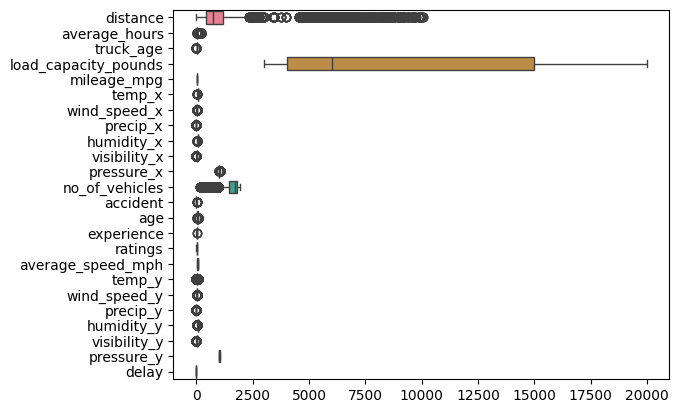

In [28]:
sns.boxplot( data=merged_norm_df , orient="h")
plt.show()

In [29]:
merged_df.dtypes

distance                float64
average_hours           float64
truck_age                 int64
load_capacity_pounds    float64
mileage_mpg               int64
fuel_type                object
temp_x                  float64
wind_speed_x            float64
precip_x                float64
humidity_x              float64
visibility_x            float64
pressure_x              float64
no_of_vehicles          float64
accident                  int64
gender                   object
age                       int64
experience                int64
driving_style            object
ratings                   int64
average_speed_mph       float64
temp_y                  float64
wind_speed_y            float64
precip_y                float64
humidity_y              float64
visibility_y            float64
pressure_y              float64
delay                     int64
dtype: object

In [30]:
merged_df.select_dtypes(include="object")

,fuel_type,gender,driving_style
0,diesel,male,proactive
1,diesel,male,proactive
2,diesel,male,proactive
3,diesel,male,conservative
4,diesel,male,conservative
...,...,...,...
12303,diesel,male,conservative
12304,diesel,male,proactive
12305,gas,female,proactive
12306,diesel,male,conservative


In [31]:
def print_uniques( cols, df=merged_df ):
    for col in cols:
        list_unique = df[col].unique()
        list_unique.sort()
        print(col, ":\n", list_unique)
        print("Number of unique categories:", len(list_unique))
        print("--------------------")

In [32]:
binary_cols = merged_df.select_dtypes(include="object").columns.to_list()
binary_cols

['fuel_type', 'gender', 'driving_style']

In [33]:
print_uniques(binary_cols)

fuel_type :
 ['Unknown' 'diesel' 'gas']
Number of unique categories: 3
--------------------
gender :
 ['female' 'male']
Number of unique categories: 2
--------------------
driving_style :
 ['Unknown' 'conservative' 'proactive']
Number of unique categories: 3
--------------------


In [34]:
merged_df = merged_df.drop(columns=['precip_x', 'precip_y'])

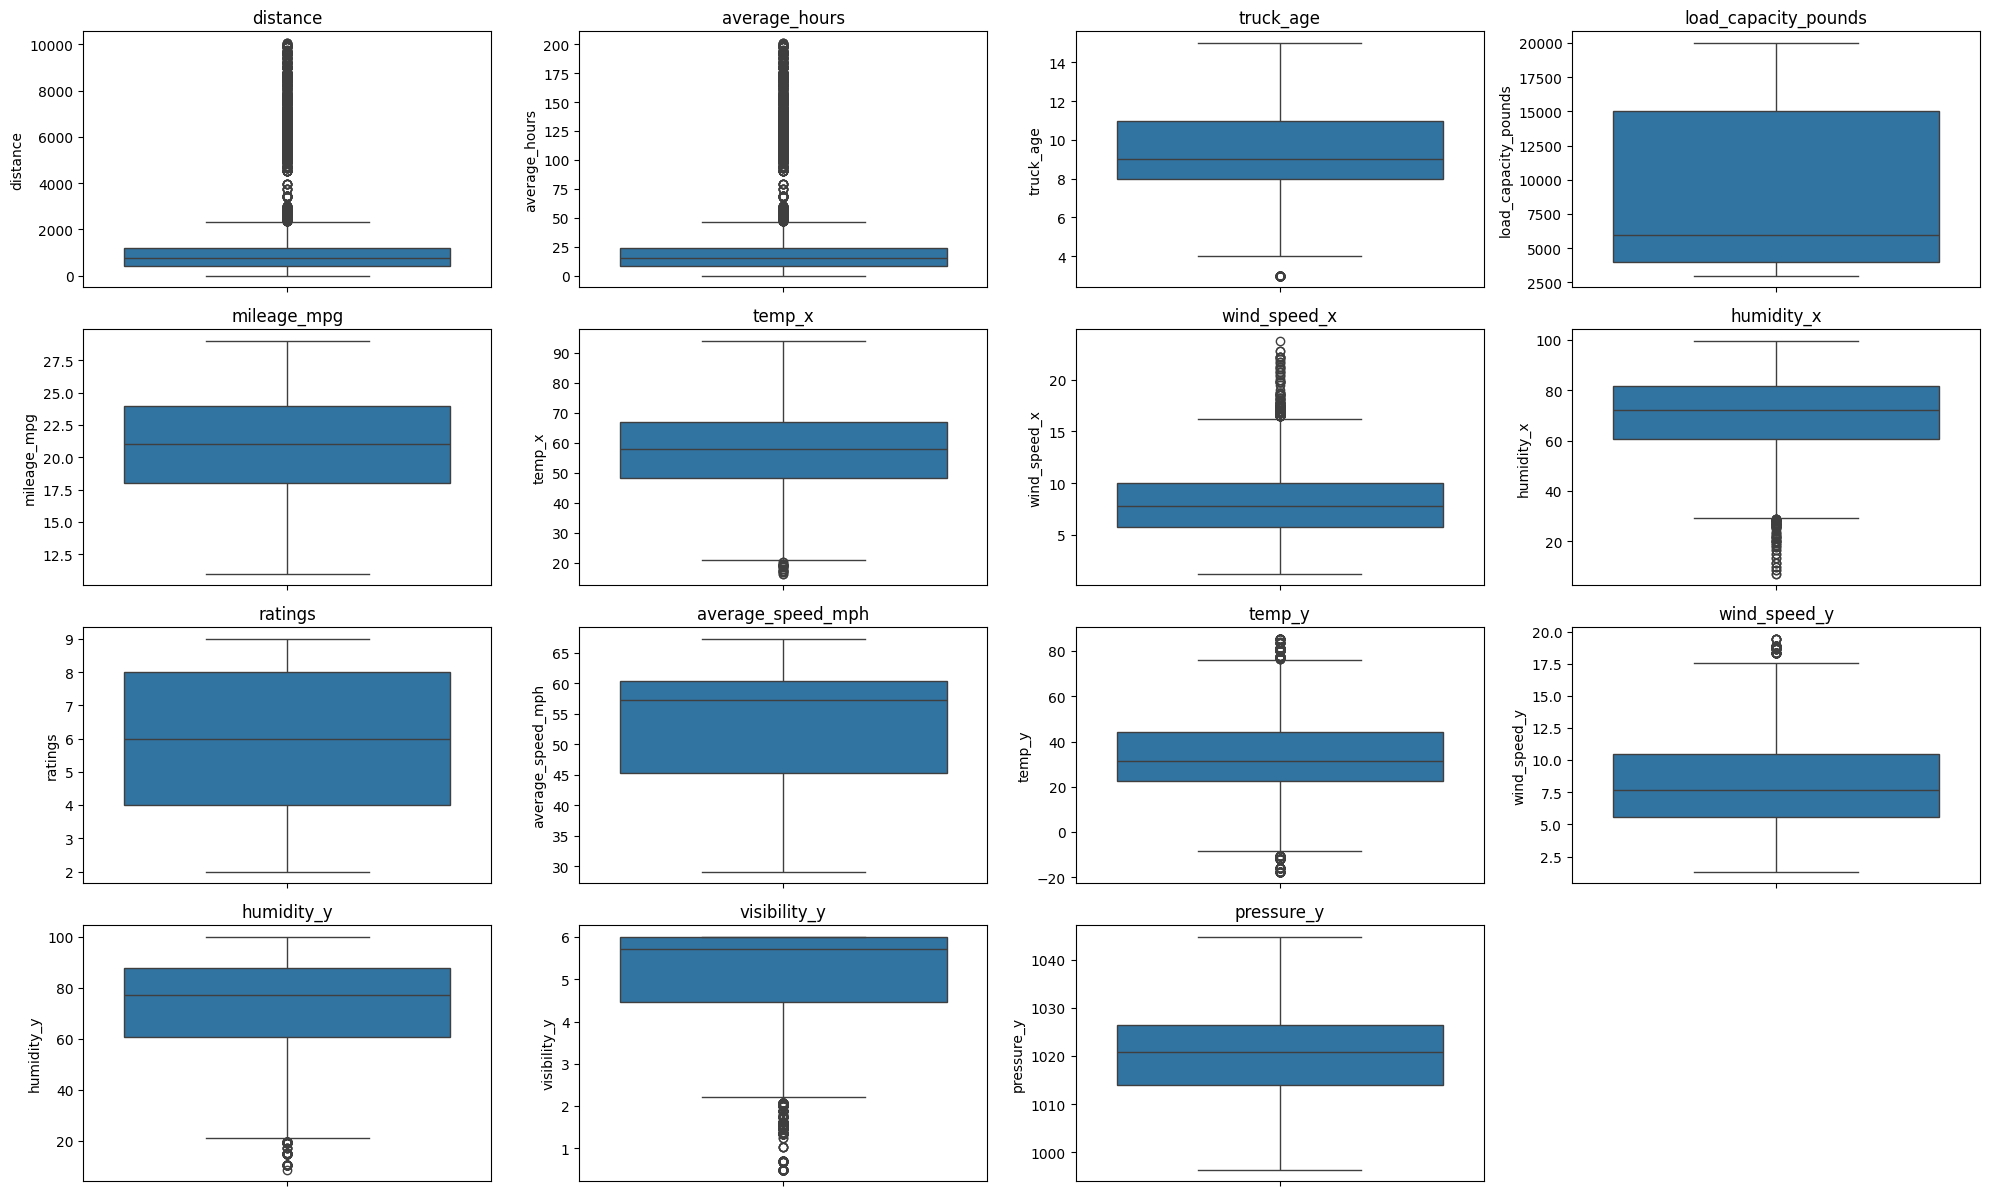

In [ ]:
numeric_columns = ['distance', 'average_hours', 'truck_age', 'load_capacity_pounds', 'mileage_mpg', 
                   'temp_x', 'wind_speed_x', 'humidity_x', 'ratings', 'average_speed_mph',
                   'temp_y', 'wind_speed_y', 'humidity_y', 'visibility_y', 'pressure_y']

plt.figure(figsize=(20, 15))
for i, col in enumerate(numeric_columns):
    plt.subplot(5, 4, i + 1)
    sns.boxplot(y=merged_df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [36]:
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

In [37]:
numeric_columns.remove('distance')
numeric_columns.remove('average_hours')


In [ ]:
cleaned_data_no_transform = remove_outliers_iqr(merged_df, numeric_columns)

cleaned_data_no_transform = cleaned_data_no_transform.dropna()


In [40]:
cleaned_data_no_transform

,distance,average_hours,truck_age,load_capacity_pounds,mileage_mpg,fuel_type,temp_x,wind_speed_x,humidity_x,visibility_x,...,experience,driving_style,ratings,average_speed_mph,temp_y,wind_speed_y,humidity_y,visibility_y,pressure_y,delay
0,310.75,6.22,9,3000.000000,23,diesel,31.00,4.25,86.00,6.00,...,9,proactive,7,57.36,26.041667,10.500000,80.625000,5.25,1027.416667,0
1,1050.84,21.02,7,15000.000000,21,diesel,43.25,9.25,78.50,6.00,...,12,proactive,8,57.04,26.041667,10.500000,80.625000,5.25,1027.416667,0
2,38.10,0.76,10,3000.000000,26,diesel,24.00,7.00,63.75,5.50,...,6,proactive,8,64.11,26.041667,10.500000,80.625000,5.25,1027.416667,0
3,688.91,13.78,12,8501.879699,27,diesel,38.50,4.50,85.50,6.00,...,16,conservative,4,49.47,26.041667,10.500000,80.625000,5.25,1027.416667,0
5,433.01,8.66,8,6000.000000,22,diesel,35.50,4.50,84.75,3.50,...,17,conservative,7,39.27,26.041667,10.500000,80.625000,5.25,1027.416667,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12303,9183.35,183.67,10,4000.000000,28,diesel,55.00,6.50,97.25,4.75,...,11,conservative,4,39.89,75.375000,9.958333,56.458333,6.00,1013.541667,0
12304,8994.17,179.88,11,3000.000000,21,diesel,41.75,4.75,82.50,5.00,...,16,proactive,7,63.88,75.375000,9.958333,56.458333,6.00,1013.541667,1
12305,9651.62,193.03,10,15000.000000,18,gas,52.50,2.75,91.00,3.50,...,21,proactive,8,60.14,75.375000,9.958333,56.458333,6.00,1013.541667,1
12306,8611.88,172.24,12,3000.000000,22,diesel,41.00,4.50,82.50,3.50,...,7,conservative,3,36.44,75.375000,9.958333,56.458333,6.00,1013.541667,1


# Save the data

In [44]:
final_merged_df = cleaned_data_no_transform.round(2)

In [45]:
final_merged_df.to_csv("../data/cleaned/truck_delay_cleaned.csv", index=False)

In [34]:
joblib.dump(final_merged_df, '../Data/DataFrame/cleaned_dataframe.joblib')

['../Data/DataFrame/cleaned_dataframe.joblib']